# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# IMPORTING CSV FILE

In [2]:
from glob import glob

In [3]:
data=glob('C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA/*')

In [4]:
for i in data:
    print(i)

C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA\LL_19-20.csv
C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA\LL_20-21.csv
C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA\LL_21-22.csv
C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA\LL_22-23.csv
C:/Users/Admin/Desktop/FOOTBALL PREDICTION END TO END/LALIGA\LL_23-24.csv


# MERGING THE DATA OF LAST FIVE YEARS INTO ONE DATASET

In [5]:
df=pd.DataFrame()
for i in data:
    dataframe=pd.read_csv(i)
    df=pd.concat([df,dataframe])

In [6]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
1,SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
2,SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
3,SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
4,SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,SP1,02/09/2023,17:30,Alaves,Valencia,1,0,H,1,0,...,1.45,0.25,1.78,2.16,1.79,2.16,1.82,2.30,1.75,2.15
35,SP1,02/09/2023,20:00,Betis,Vallecano,1,0,H,0,0,...,1.66,-0.50,2.10,1.83,2.09,1.85,2.13,1.88,2.06,1.82
36,SP1,03/09/2023,13:00,Girona,Las Palmas,1,0,H,0,0,...,1.90,-0.75,1.97,1.96,1.96,1.96,1.98,2.04,1.90,1.95
37,SP1,03/09/2023,15:15,Mallorca,Ath Bilbao,0,0,D,0,0,...,1.47,0.25,1.70,2.10,1.76,2.19,1.80,2.21,1.73,2.14


In [7]:
betting_columns = [
    'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
    'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA',
    'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
    'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5',
    'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA',
    'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA',
    'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA',
    'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
    'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5',
    'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA'
]


df.drop(betting_columns, axis=1, inplace=True)


In [8]:
df=df.rename(columns={
    'FTHG': 'Full Time Home Goal',
    'FTAG': 'Full Time Away Goal',
    'FTR': 'Result',
    'HTHG': 'Half Time Home Goal',
    'HTAG': 'Half Time Away Goal',
    'HTR': 'Half Time Result',
    'HS': 'Home Shots Taken',
    'AS': 'Away Shots Taken',
    'HST': 'Home Shots on Target',
    'AST': 'Away Shots on Target',
    'HF': 'Home Team Fouls',
    'AF': 'Away Team Fouls',
    'HC': 'Home Team Corner',
    'AC': 'Away Team Corner',
    'HY': 'Home Team Yellow',
    'AY': 'Away Team Yellow',
    'HR': 'Home Team Red',
    'AR': 'Away Team Red'
})


In [9]:
df

,Div,Date,Time,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Result,Half Time Home Goal,Half Time Away Goal,...,Home Shots on Target,Away Shots on Target,Home Team Fouls,Away Team Fouls,Home Team Corner,Away Team Corner,Home Team Yellow,Away Team Yellow,Home Team Red,Away Team Red
0,SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,5,2,14,9,3,8,1,1,0,0
1,SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,4,11,17,12,6,4,5,2,0,1
2,SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,6,3,13,14,3,3,4,4,1,0
3,SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,4,5,13,14,9,3,2,3,0,0
4,SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,2,2,17,11,8,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,SP1,02/09/2023,17:30,Alaves,Valencia,1,0,H,1,0,...,1,4,18,9,1,2,4,2,0,0
35,SP1,02/09/2023,20:00,Betis,Vallecano,1,0,H,0,0,...,5,6,22,20,2,3,3,5,0,0
36,SP1,03/09/2023,13:00,Girona,Las Palmas,1,0,H,0,0,...,6,5,15,10,3,5,3,3,0,0
37,SP1,03/09/2023,15:15,Mallorca,Ath Bilbao,0,0,D,0,0,...,2,3,12,17,3,5,0,1,0,0


In [10]:

df.drop(['Div'],axis=1,inplace=True)

<AxesSubplot:xlabel='Result', ylabel='count'>

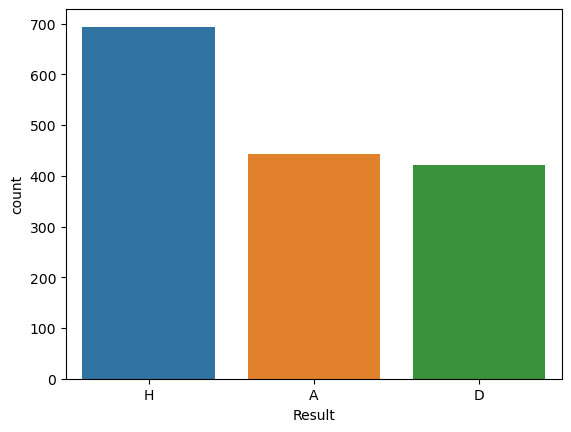

In [11]:
sns.countplot(df['Result'])

In [12]:
df.select_dtypes(include=['O']).columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'Result', 'Half Time Result'], dtype='object')

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df

,Date,Time,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Result,Half Time Home Goal,Half Time Away Goal,Half Time Result,...,Home Shots on Target,Away Shots on Target,Home Team Fouls,Away Team Fouls,Home Team Corner,Away Team Corner,Home Team Yellow,Away Team Yellow,Home Team Red,Away Team Red
0,2019-08-16,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,D,...,5,2,14,9,3,8,1,1,0,0
1,2019-08-17,16:00,Celta,Real Madrid,1,3,A,0,1,A,...,4,11,17,12,6,4,5,2,0,1
2,2019-08-17,18:00,Valencia,Sociedad,1,1,D,0,0,D,...,6,3,13,14,3,3,4,4,1,0
3,2019-08-17,19:00,Mallorca,Eibar,2,1,H,1,0,H,...,4,5,13,14,9,3,2,3,0,0
4,2019-08-17,20:00,Leganes,Osasuna,0,1,A,0,0,D,...,2,2,17,11,8,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2023-02-09,17:30,Alaves,Valencia,1,0,H,1,0,H,...,1,4,18,9,1,2,4,2,0,0
35,2023-02-09,20:00,Betis,Vallecano,1,0,H,0,0,D,...,5,6,22,20,2,3,3,5,0,0
36,2023-03-09,13:00,Girona,Las Palmas,1,0,H,0,0,D,...,6,5,15,10,3,5,3,3,0,0
37,2023-03-09,15:15,Mallorca,Ath Bilbao,0,0,D,0,0,D,...,2,3,12,17,3,5,0,1,0,0


# ROLLING AVERAGES 

In [96]:
# Assuming you want to calculate the averages for both the home and away teams, you can sum the respective columns.
home_goals = df[["Full Time Home Goal"]]
away_goals = df[["Full Time Away Goal"]]

# Calculate the rolling averages for each team's goals for their last 5 matches
rolling_avg_home = home_goals.rolling(window=5).mean()
rolling_avg_away = away_goals.rolling(window=5).mean()

# Reset the index of the rolling averages DataFrames
rolling_avg_home.reset_index(drop=True, inplace=True)
rolling_avg_away.reset_index(drop=True, inplace=True)

# Add the rolling averages as new columns in the original DataFrame
df["Average Goals (Home Team)"] = rolling_avg_home.mean(axis=1)
df["Average Goals (Away Team)"] = rolling_avg_away.mean(axis=1)






In [97]:
home_shots_on_target = df[["Home Shots on Target"]]
away_shots_on_target = df[["Away Shots on Target"]]


rolling_avg_home = home_shots_on_target.rolling(window=5).mean()
rolling_avg_away = away_shots_on_target.rolling(window=5).mean()


rolling_avg_home.reset_index(drop=True, inplace=True)
rolling_avg_away.reset_index(drop=True, inplace=True)


df["Average Shots (Home Team)"] = rolling_avg_home.mean(axis=1)
df["Average Shots (Away Team)"] = rolling_avg_away.mean(axis=1)

In [98]:
home_shots = df[["Home Shots Taken"]]

away_shots = df[["Away Shots Taken"]]
rolling_avg_home = home_shots.rolling(window=5).mean()
rolling_avg_away = away_shots.rolling(window=5).mean()

rolling_avg_home.reset_index(drop=True, inplace=True)
rolling_avg_away.reset_index(drop=True, inplace=True)

df["Average Shots Taken (Home Team)"] = rolling_avg_home.mean(axis=1)
df["Average Shots Taken (Away Team)"] = rolling_avg_away.mean(axis=1)

In [99]:
home_goals = df[["Half Time Home Goal"]]
away_goals = df[["Half Time Away Goal"]]


rolling_avg_home = home_goals.rolling(window=5).mean()
rolling_avg_away = away_goals.rolling(window=5).mean()

rolling_avg_home.reset_index(drop=True, inplace=True)
rolling_avg_away.reset_index(drop=True, inplace=True)


df["Average Half Time Goals (Home Team)"] = rolling_avg_home.mean(axis=1)
df["Average Half Time Goals (Away Team)"] = rolling_avg_away.mean(axis=1)


In [100]:
df

,Date,Time,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Result,Half Time Home Goal,Half Time Away Goal,Half Time Result,...,Average Shots Taken (Home Team),Average Shots Taken (Away Team),Average Half Time Goals (Home Team),Average Half Time Goals (Away Team),GoalDifference,ShotDifference,Expected Goals (Home Team),Expected Goals (Away Team),Odds (Home Team),Odds (Away Team)
9,2019-08-18,21:00,Ath Madrid,Getafe,1,0,H,1,0,H,...,9.8,7.2,0.4,0.2,-0.2,1.2,1.463402,1.066738,7.500000,5.0
10,2019-08-23,19:00,Granada,Sevilla,0,1,A,0,0,D,...,11.6,6.2,0.4,0.4,0.2,1.0,1.447010,1.044436,2.500000,3.0
11,2019-08-23,21:00,Levante,Villarreal,2,1,H,0,1,A,...,14.2,5.8,0.2,0.2,0.2,1.8,1.447010,1.044436,2.500000,3.0
12,2019-08-24,16:00,Osasuna,Eibar,0,0,D,0,0,D,...,15.2,5.2,0.6,0.2,0.6,2.2,1.447010,1.033460,1.875000,3.0
13,2019-08-24,18:00,Real Madrid,Valladolid,1,1,D,0,0,D,...,15.8,4.4,0.8,0.2,0.8,2.4,1.438883,1.022600,1.500000,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2023-02-09,17:30,Alaves,Valencia,1,0,H,1,0,H,...,14.0,10.0,0.0,0.2,0.4,1.4,1.479980,1.061118,5.000000,15.0
35,2023-02-09,20:00,Betis,Vallecano,1,0,H,0,0,D,...,14.4,9.2,0.2,0.0,0.8,2.4,1.488339,1.055528,3.750000,inf
36,2023-03-09,13:00,Girona,Las Palmas,1,0,H,0,0,D,...,14.8,9.2,0.6,0.0,1.2,2.0,1.471668,1.033460,1.875000,7.5
37,2023-03-09,15:15,Mallorca,Ath Bilbao,0,0,D,0,0,D,...,14.6,9.8,0.6,0.4,0.4,1.0,1.447010,1.038933,2.142857,3.0


In [101]:
df.dropna(inplace=True)

# MODEL BUILDING

In [103]:
features=["HomeTeam","AwayTeam","Average Goals (Home Team)","Average Goals (Away Team)","Average Shots (Home Team)","Average Shots (Away Team)","Average Shots Taken (Home Team)","Average Shots Taken (Away Team)"]
X=df[features]

In [104]:
y=df['Result']

In [105]:
y


9     H
10    A
11    H
12    D
13    D
     ..
34    H
35    H
36    H
37    D
38    A
Name: Result, Length: 1514, dtype: object

In [106]:
X

,HomeTeam,AwayTeam,Average Goals (Home Team),Average Goals (Away Team),Average Shots (Home Team),Average Shots (Away Team),Average Shots Taken (Home Team),Average Shots Taken (Away Team)
9,Ath Madrid,Getafe,0.4,0.6,3.6,2.4,9.8,7.2
10,Granada,Sevilla,1.2,1.0,3.8,2.8,11.6,6.2
11,Levante,Villarreal,1.2,1.0,4.4,2.6,14.2,5.8
12,Osasuna,Eibar,1.6,1.0,5.0,2.8,15.2,5.2
13,Real Madrid,Valladolid,2.0,1.2,5.2,2.8,15.8,4.4
...,...,...,...,...,...,...,...,...
34,Alaves,Valencia,0.6,0.2,4.6,3.2,14.0,10.0
35,Betis,Vallecano,0.8,0.0,5.0,2.6,14.4,9.2
36,Girona,Las Palmas,1.6,0.4,4.8,2.8,14.8,9.2
37,Mallorca,Ath Bilbao,1.4,1.0,4.2,3.2,14.6,9.8


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
print(naive_bayes_model.classes_)


['A' 'D' 'H']


In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()

X_encoded = X.copy()
X_encoded["HomeTeam"] = label_encoder.fit_transform(X["HomeTeam"])
X_encoded["AwayTeam"] = label_encoder.transform(X["AwayTeam"])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)
y_tpred = naive_bayes_model.predict(X_train)


In [113]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracyt = accuracy_score(y_train, y_tpred)


In [114]:
accuracy

0.48184818481848185

In [115]:
from xgboost import XGBClassifier

In [116]:
y=le.fit_transform(y)

In [117]:
y

array([2, 0, 2, ..., 2, 1, 0])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [119]:
xgb= XGBClassifier()

In [120]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [121]:
y_pred=xgb.predict(X_test)

In [122]:
accuracy_score(y_test, y_pred)

0.44224422442244227

In [123]:
from sklearn.metrics import classification_report

In [124]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.34      0.34      0.34        85\n           1       0.22      0.18      0.20        72\n           2       0.58      0.63      0.61       146\n\n    accuracy                           0.44       303\n   macro avg       0.38      0.38      0.38       303\nweighted avg       0.43      0.44      0.43       303\n'

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

df['GoalDifference'] = df['Average Goals (Home Team)'] - df['Average Goals (Away Team)']
df['ShotDifference'] = df['Average Shots (Home Team)'] - df['Average Shots (Away Team)']


X = df[['GoalDifference', 'ShotDifference',"Average Shots (Away Team)","Average Shots (Home Team)"]]
y = df['Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)
accuracy


0.48184818481848185

In [127]:
df

,Date,Time,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Result,Half Time Home Goal,Half Time Away Goal,Half Time Result,...,Average Shots Taken (Home Team),Average Shots Taken (Away Team),Average Half Time Goals (Home Team),Average Half Time Goals (Away Team),GoalDifference,ShotDifference,Expected Goals (Home Team),Expected Goals (Away Team),Odds (Home Team),Odds (Away Team)
9,2019-08-18,21:00,Ath Madrid,Getafe,1,0,H,1,0,H,...,9.8,7.2,0.4,0.2,-0.2,1.2,1.463402,1.066738,7.500000,5.0
10,2019-08-23,19:00,Granada,Sevilla,0,1,A,0,0,D,...,11.6,6.2,0.4,0.4,0.2,1.0,1.447010,1.044436,2.500000,3.0
11,2019-08-23,21:00,Levante,Villarreal,2,1,H,0,1,A,...,14.2,5.8,0.2,0.2,0.2,1.8,1.447010,1.044436,2.500000,3.0
12,2019-08-24,16:00,Osasuna,Eibar,0,0,D,0,0,D,...,15.2,5.2,0.6,0.2,0.6,2.2,1.447010,1.033460,1.875000,3.0
13,2019-08-24,18:00,Real Madrid,Valladolid,1,1,D,0,0,D,...,15.8,4.4,0.8,0.2,0.8,2.4,1.438883,1.022600,1.500000,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2023-02-09,17:30,Alaves,Valencia,1,0,H,1,0,H,...,14.0,10.0,0.0,0.2,0.4,1.4,1.479980,1.061118,5.000000,15.0
35,2023-02-09,20:00,Betis,Vallecano,1,0,H,0,0,D,...,14.4,9.2,0.2,0.0,0.8,2.4,1.488339,1.055528,3.750000,inf
36,2023-03-09,13:00,Girona,Las Palmas,1,0,H,0,0,D,...,14.8,9.2,0.6,0.0,1.2,2.0,1.471668,1.033460,1.875000,7.5
37,2023-03-09,15:15,Mallorca,Ath Bilbao,0,0,D,0,0,D,...,14.6,9.8,0.6,0.4,0.4,1.0,1.447010,1.038933,2.142857,3.0


# BUILDING STAT MODEL USING POISON FORMULA

In [128]:
import pandas as pd
import statsmodels.api as sm

In [142]:

poisson_model = sm.GLM.from_formula("Q('Average Goals (Home Team)') ~ Q('Average Goals (Away Team)')", 
                                    data=df, family=sm.families.Poisson()).fit()

poisson_model_away = sm.GLM.from_formula("Q('Average Goals (Away Team)') ~ Q('Average Goals (Home Team)')", 
                                    data=df, family=sm.families.Poisson()).fit()


df['Expected Goals (Home Team)'] = poisson_model.predict(df)
df['Expected Goals (Away Team)'] = poisson_model_away.predict(df)


# Feature Engineering

df['Odds (Home Team)'] = 5 / df['Expected Goals (Home Team)']
df['Odds (Away Team)'] = 5 / df['Expected Goals (Away Team)']


print(df[['HomeTeam', 'Odds (Home Team)', 'AwayTeam', 'Odds (Away Team)']])


       HomeTeam  Odds (Home Team)    AwayTeam  Odds (Away Team)
9    Ath Madrid          3.416696      Getafe          4.687187
10      Granada          3.455401     Sevilla          4.787274
11      Levante          3.455401  Villarreal          4.787274
12      Osasuna          3.455401       Eibar          4.838116
13  Real Madrid          3.474918  Valladolid          4.889499
..          ...               ...         ...               ...
34       Alaves          3.378424    Valencia          4.712011
35        Betis          3.359449   Vallecano          4.736966
36       Girona          3.397506  Las Palmas          4.838116
37     Mallorca          3.455401  Ath Bilbao          4.812628
38      Osasuna          3.474918   Barcelona          4.838116

[1514 rows x 4 columns]


In [143]:
df[df["HomeTeam"]=="Barcelona"]

,Date,Time,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Result,Half Time Home Goal,Half Time Away Goal,Half Time Result,...,Average Shots Taken (Home Team),Average Shots Taken (Away Team),Average Half Time Goals (Home Team),Average Half Time Goals (Away Team),GoalDifference,ShotDifference,Expected Goals (Home Team),Expected Goals (Away Team),Odds (Home Team),Odds (Away Team)
19,2019-08-25,20:00,Barcelona,Betis,5,2,H,1,1,D,...,12.8,13.2,0.4,0.6,0.6,-0.4,1.438883,1.028016,3.474918,4.863740
34,2019-09-14,20:00,Barcelona,Valencia,5,2,H,2,1,H,...,14.0,10.0,0.0,0.2,0.4,1.4,1.479980,1.061118,3.378424,4.712011
52,2019-09-24,20:00,Barcelona,Villarreal,2,1,H,2,1,H,...,15.4,8.6,0.8,0.6,1.4,1.4,1.447010,1.011854,3.455401,4.941427
79,2019-06-10,20:00,Barcelona,Sevilla,4,0,H,3,0,H,...,14.4,11.8,0.8,0.4,0.8,0.6,1.463402,1.038933,3.416696,4.812628
100,2019-10-29,20:15,Barcelona,Valladolid,5,1,H,3,1,H,...,15.8,9.4,1.4,0.0,1.4,2.8,1.438883,1.006523,3.474918,4.967597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2023-04-29,20:00,Barcelona,Betis,4,0,H,3,0,H,...,9.8,10.4,1.0,0.8,0.2,0.0,1.422765,1.028016,3.514283,4.863740
321,2023-02-05,18:30,Barcelona,Osasuna,1,0,H,0,0,D,...,12.2,8.8,0.4,0.4,0.6,0.6,1.463402,1.044436,3.416696,4.787274
345,2023-05-20,20:00,Barcelona,Sociedad,1,2,A,0,1,A,...,11.2,13.0,0.2,1.2,-0.4,-1.2,1.438883,1.055528,3.474918,4.736966
364,2023-05-28,18:00,Barcelona,Mallorca,3,0,H,2,0,H,...,9.6,13.0,0.6,0.6,0.4,-1.8,1.438883,1.033460,3.474918,4.838116


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1514 entries, 9 to 38
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 1514 non-null   datetime64[ns]
 1   Time                                 1514 non-null   object        
 2   HomeTeam                             1514 non-null   object        
 3   AwayTeam                             1514 non-null   object        
 4   Full Time Home Goal                  1514 non-null   int64         
 5   Full Time Away Goal                  1514 non-null   int64         
 6   Result                               1514 non-null   object        
 7   Half Time Home Goal                  1514 non-null   int64         
 8   Half Time Away Goal                  1514 non-null   int64         
 9   Half Time Result                     1514 non-null   object        
 10  Home Shots Tak

In [145]:
df.to_csv("Laliga Model.csv",index=False)